In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from pathlib import Path
import json

basepath = Path('/Users/aryamangupta/CricML/Match_Prediction/')
data_folder_path = basepath / 'data' / 'ipl_json'


    
                


        

In [188]:
stadium_to_city = {
    # Delhi
    'Arun Jaitley Stadium': 'Delhi_A',
    'Arun Jaitley Stadium, Delhi': 'Delhi_A',
    'Feroz Shah Kotla': 'Delhi_A',  # This is the old name of Arun Jaitley Stadium
    
    # Mumbai (3 different stadiums)
    'Brabourne Stadium': 'Mumbai_A',
    'Brabourne Stadium, Mumbai': 'Mumbai_A',
    'Dr DY Patil Sports Academy': 'Mumbai_B',
    'Dr DY Patil Sports Academy, Mumbai': 'Mumbai_B',
    'Wankhede Stadium': 'Mumbai_C',
    'Wankhede Stadium, Mumbai': 'Mumbai_C',
    
    # Pune (2 different stadiums)
    'Maharashtra Cricket Association Stadium': 'Pune_A',
    'Maharashtra Cricket Association Stadium, Pune': 'Pune_A',
    'Subrata Roy Sahara Stadium': 'Pune_A',  # Old name of MCA Stadium
    'Nehru Stadium': 'Pune_B',
    
    # Mohali/Chandigarh area (2 different stadiums)
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur': 'Mohali_B',
    'Punjab Cricket Association IS Bindra Stadium': 'Mohali_A',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Mohali_A',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Mohali_A',
    'Punjab Cricket Association Stadium, Mohali': 'Mohali_A',
    
    # Abu Dhabi (same stadium, different names)
    'Sheikh Zayed Stadium': 'Abu_Dhabi_A',
    'Zayed Cricket Stadium, Abu Dhabi': 'Abu_Dhabi_A',
    
    # Other Indian Cities (single stadium each)
    'Barabati Stadium': 'Cuttack',
    'Barsapara Cricket Stadium, Guwahati': 'Guwahati',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 'Lucknow',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Visakhapatnam',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Visakhapatnam',
    'Eden Gardens': 'Kolkata',
    'Eden Gardens, Kolkata': 'Kolkata',
    'Green Park': 'Kanpur',
    'Himachal Pradesh Cricket Association Stadium': 'Dharamsala',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Dharamsala',
    'Holkar Cricket Stadium': 'Indore',
    'JSCA International Stadium Complex': 'Ranchi',
    'M Chinnaswamy Stadium': 'Bengaluru',
    'M Chinnaswamy Stadium, Bengaluru': 'Bengaluru',
    'M.Chinnaswamy Stadium': 'Bengaluru',
    'MA Chidambaram Stadium': 'Chennai',
    'MA Chidambaram Stadium, Chepauk': 'Chennai',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'Chennai',
    'Narendra Modi Stadium, Ahmedabad': 'Ahmedabad',
    'Sardar Patel Stadium, Motera': 'Ahmedabad',  # Old name of Narendra Modi Stadium
    'Rajiv Gandhi International Stadium': 'Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal': 'Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Hyderabad',
    'Saurashtra Cricket Association Stadium': 'Rajkot',
    'Sawai Mansingh Stadium': 'Jaipur',
    'Sawai Mansingh Stadium, Jaipur': 'Jaipur',
    'Shaheed Veer Narayan Singh International Stadium': 'Raipur',
    'Vidarbha Cricket Association Stadium, Jamtha': 'Nagpur',
    
    # UAE Stadiums (other)
    'Dubai International Cricket Stadium': 'Dubai',
    'Sharjah Cricket Stadium': 'Sharjah',
    
    # South African Stadiums
    'Buffalo Park': 'East_London',
    'De Beers Diamond Oval': 'Kimberley',
    'Kingsmead': 'Durban',
    'New Wanderers Stadium': 'Johannesburg',
    'Newlands': 'Cape_Town',
    'OUTsurance Oval': 'Bloemfontein',
    "St George's Park": 'Port_Elizabeth',
    'SuperSport Park': 'Centurion'
}

In [190]:
dataset = []


for json_path in sorted(data_folder_path.glob('*.json')):
    with json_path.open() as f:
        json_data = f.read()
        match_data = json.loads(json_data)
        # print (data['info'])
        year = match_data["info"]["dates"][0].split('-')[0]
        # print(year)
        stadium = stadium_to_city[match_data["info"]["venue"]]

        for inning in match_data['innings']:
            inning_dataset = []
            for over in inning['overs']:
                for delivery in over['deliveries']:
                    delivery_data = []
                    if 'wickets' in delivery:
                        delivery_data.append('W')
                    else:
                        delivery_data.append(str(delivery['runs']['total']))

                    delivery_data.append(stadium)
                    inning_dataset.append(delivery_data)
                    
            dataset.append((inning_dataset,year))

In [195]:
print(len(dataset))
print((dataset[0][0]))

2217
[['0', 'Hyderabad'], ['0', 'Hyderabad'], ['4', 'Hyderabad'], ['0', 'Hyderabad'], ['2', 'Hyderabad'], ['0', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['4', 'Hyderabad'], ['1', 'Hyderabad'], ['6', 'Hyderabad'], ['W', 'Hyderabad'], ['0', 'Hyderabad'], ['4', 'Hyderabad'], ['1', 'Hyderabad'], ['0', 'Hyderabad'], ['0', 'Hyderabad'], ['3', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['0', 'Hyderabad'], ['1', 'Hyderabad'], ['0', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['2', 'Hyderabad'], ['4', 'Hyderabad'], ['0', 'Hyderabad'], ['4', 'Hyderabad'], ['4', 'Hyderabad'], ['0', 'Hyderabad'], ['4', 'Hyderabad'], ['4', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['0', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderabad'], ['6', 'Hyderabad'], ['1', 'Hyderabad'], ['1', 'Hyderab

In [198]:
# print(dataset[0][11])
all_runs = [balls[0] for inning,year in dataset for balls in inning]
runs = sorted(list(set(all_runs)))
print(runs)
stoi = {s:i+1 for i,s in enumerate(runs)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)




['0', '1', '2', '3', '4', '5', '6', '7', 'W']
{1: '0', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6', 8: '7', 9: 'W', 0: '.'}


In [200]:
#stadium embeddings
# TO DO:add one stadium type for unrecognised stadium
all_stadiums = [balls[1] for inning,year in dataset for balls in inning]
stadiums = sorted(list(set(all_stadiums)))
print(stadiums)
stadiumtoi = {s:i+1 for i,s in enumerate(stadiums)}
#stadiumtoi['.'] = 0
itostadium = {i:s for s,i in stadiumtoi.items()}
print(itostadium)

['Abu_Dhabi_A', 'Ahmedabad', 'Bengaluru', 'Bloemfontein', 'Cape_Town', 'Centurion', 'Chennai', 'Cuttack', 'Delhi_A', 'Dharamsala', 'Dubai', 'Durban', 'East_London', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kolkata', 'Lucknow', 'Mohali_A', 'Mohali_B', 'Mumbai_A', 'Mumbai_B', 'Mumbai_C', 'Nagpur', 'Port_Elizabeth', 'Pune_A', 'Pune_B', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam']
{1: 'Abu_Dhabi_A', 2: 'Ahmedabad', 3: 'Bengaluru', 4: 'Bloemfontein', 5: 'Cape_Town', 6: 'Centurion', 7: 'Chennai', 8: 'Cuttack', 9: 'Delhi_A', 10: 'Dharamsala', 11: 'Dubai', 12: 'Durban', 13: 'East_London', 14: 'Guwahati', 15: 'Hyderabad', 16: 'Indore', 17: 'Jaipur', 18: 'Johannesburg', 19: 'Kanpur', 20: 'Kimberley', 21: 'Kolkata', 22: 'Lucknow', 23: 'Mohali_A', 24: 'Mohali_B', 25: 'Mumbai_A', 26: 'Mumbai_B', 27: 'Mumbai_C', 28: 'Nagpur', 29: 'Port_Elizabeth', 30: 'Pune_A', 31: 'Pune_B', 32: 'Raipur', 33: 'Rajkot', 34: 'Ranchi', 35: 'Sharjah', 36: 'Visakha

In [75]:
years = [year for match,year in dataset for run in match]
year_count = {}
for yearn in years:
    if yearn not in year_count:
        year_count[yearn]=1
    else:
        year_count[yearn]+=1

total_deliveries = sum(year_count.values())
print(total_deliveries)
year_percentages = {year: (count/total_deliveries)*100 for year,count in year_count.items()}



260920


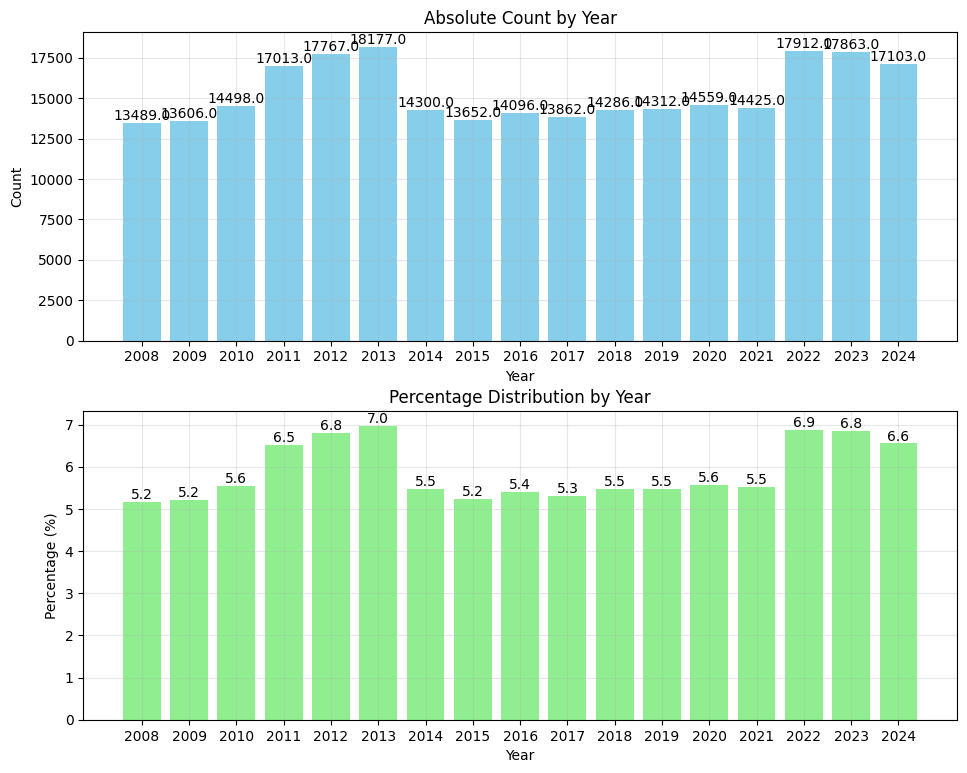

In [76]:
sorted_years = sorted(year_count.keys())
counts = [year_count[year] for year in sorted_years]
percentages = [year_percentages[year] for year in sorted_years]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.tight_layout(pad=3.0)

# Plot absolute counts
ax1.bar(sorted_years, counts, color='skyblue')
ax1.set_title('Absolute Count by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)

# Plot percentages
ax2.bar(sorted_years, percentages, color='lightgreen')
ax2.set_title('Percentage Distribution by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage (%)')
ax2.grid(True, alpha=0.3)

# Add value labels on top of each bar
for ax in [ax1, ax2]:
    for i, v in enumerate(counts if ax == ax1 else percentages):
        ax.text(sorted_years[i], v, f'{v:.1f}', 
                ha='center', va='bottom')

plt.show()

In [207]:
block_size = 6
def create_xy_pairs(data, block_size, stoi, stadiumtoi):
    X_outcome, X_stadium, Y = [], [], []  # separate lists for outcomes and stadiums
    for match in data:
        ix_stadium = stadiumtoi[match[0][0][1]]
        context_outcome = [0] * block_size
        context_stadium = [ix_stadium] * block_size  # add stadium context
        for ball in match[0]:
            outcome = ball[0]
            stadium = ball[1]
            
            ix = stoi[outcome]
            ix_stadium = stadiumtoi[stadium]
            
            X_outcome.append(context_outcome)
            X_stadium.append(context_stadium)  # append stadium context
            Y.append(ix)
            
            context_outcome = context_outcome[1:] + [ix]
            # context_stadium = context_stadium[1:] + [ix_stadium]  # update stadium context
            
    return torch.tensor(X_outcome), torch.tensor(X_stadium), torch.tensor(Y)

# Split data based on years
train_data = [inning for inning in dataset if int(inning[1]) <= 2020]
val_data = [inning for inning in dataset if int(inning[1]) in [2021, 2022]]
test_data = [inning for inning in dataset if int(inning[1]) >= 2023]

# Create X,Y pairs for each split
X_train_outcome, X_train_stadium, y_train = create_xy_pairs(train_data, block_size, stoi, stadiumtoi)
X_val_outcome, X_val_stadium, y_val = create_xy_pairs(val_data, block_size, stoi, stadiumtoi)
X_test_outcome, X_test_stadium, y_test = create_xy_pairs(test_data, block_size, stoi, stadiumtoi)

In [208]:
X_train_stadium.shape, X_train_stadium.dtype, y_train.shape, y_train.dtype
# X_val.shape[0] + X_train.shape[0] + X_test.shape[0]

(torch.Size([193617, 6]), torch.int64, torch.Size([193617]), torch.int64)

In [212]:
g = torch.Generator().manual_seed(428)
C_outcome = torch.randn ((10,2), generator=g)
C_stadium = torch.randn ((37,2), generator=g)
W1 = torch.randn((24,300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300,10),generator=g)*0.1
b2 = torch.randn(10, generator=g)*0
parameters = [C_outcome, C_stadium, W1, b1, W2, b2]

In [213]:
sum(p.nelement() for p in parameters)

10604

In [214]:
for p in parameters:
    p.requires_grad = True

In [82]:
lre = torch.linspace(-2,0,1000)
lrs = 10**lre

In [227]:
#Add learning rate decay

lri = []
lossi = []

for i in range (10000):

    #minibatch construction
    ix = torch.randint(0,X_train_outcome.shape[0],(32,))
    #forward pass
    emb_outcome = C_outcome[X_train_outcome[ix]]
    emb_stadium = C_stadium[X_train_stadium[ix]]
    emb = torch.cat([emb_outcome, emb_stadium], dim=-1) 
    h = torch.tanh(emb.view(-1,24) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, y_train[ix])
    # print(loss.item())
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    # lr = lrs[i]
    lr = 10**-1.5
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    # lri.append(lre[i])
    lossi.append(loss.log10().item())

(array([456855., 413894., 403862., 480108., 403731., 283749., 192370.,
        148497., 137676., 119132., 105870., 106635., 105625.,  93881.,
         88892.,  84858.,  85876.,  87478.,  92550., 105398., 118470.,
        131770., 141648., 148566., 145283., 143136., 143223., 132918.,
        123834., 118996., 117941., 111238., 105064., 115081., 123636.,
        128858., 134912., 141257., 142789., 129057., 113057.,  93879.,
        114120., 182803., 267177., 327275., 402517., 474093., 548969.,
        582596.]),
 array([-9.99067903e-01, -9.59103128e-01, -9.19138353e-01, -8.79173578e-01,
        -8.39208803e-01, -7.99244028e-01, -7.59279253e-01, -7.19314479e-01,
        -6.79349704e-01, -6.39384929e-01, -5.99420154e-01, -5.59455379e-01,
        -5.19490604e-01, -4.79525830e-01, -4.39561055e-01, -3.99596280e-01,
        -3.59631505e-01, -3.19666730e-01, -2.79701955e-01, -2.39737180e-01,
        -1.99772406e-01, -1.59807631e-01, -1.19842856e-01, -7.98780811e-02,
        -3.99133062e-02,  5.

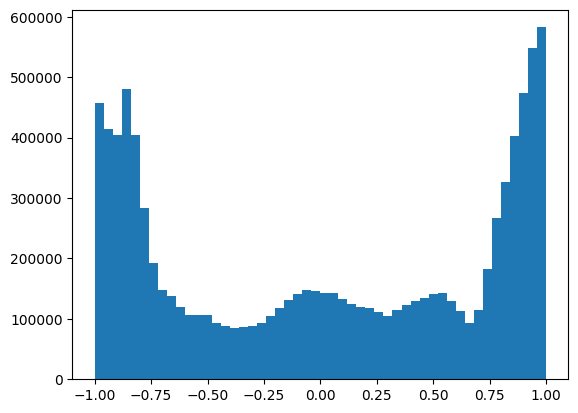

In [154]:
plt.hist(h.view(-1).tolist(),50)

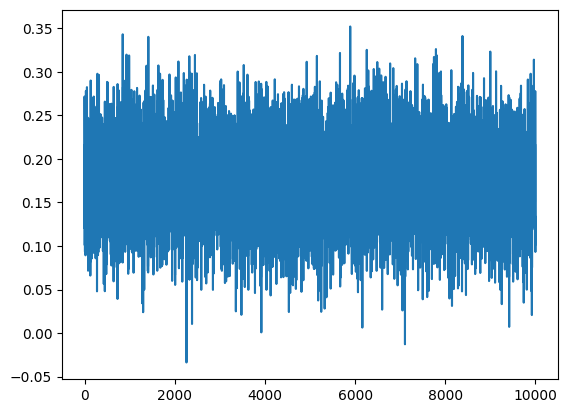

In [228]:
plt.plot(lossi)

In [229]:
emb_outcome = C_outcome[X_train_outcome]
emb_stadium = C_stadium[X_train_stadium]
emb = torch.cat([emb_outcome, emb_stadium], dim=-1)
h = torch.tanh(emb.view(-1,24) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y_train)
loss

tensor(1.4950, grad_fn=<NllLossBackward0>)

In [231]:
emb_outcome = C_outcome[X_val_outcome]
emb_stadium = C_stadium[X_val_stadium]
emb = torch.cat([emb_outcome, emb_stadium], dim=-1)
h = torch.tanh(emb.view(-1,24) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, y_val)
loss

tensor(1.5091, grad_fn=<NllLossBackward0>)

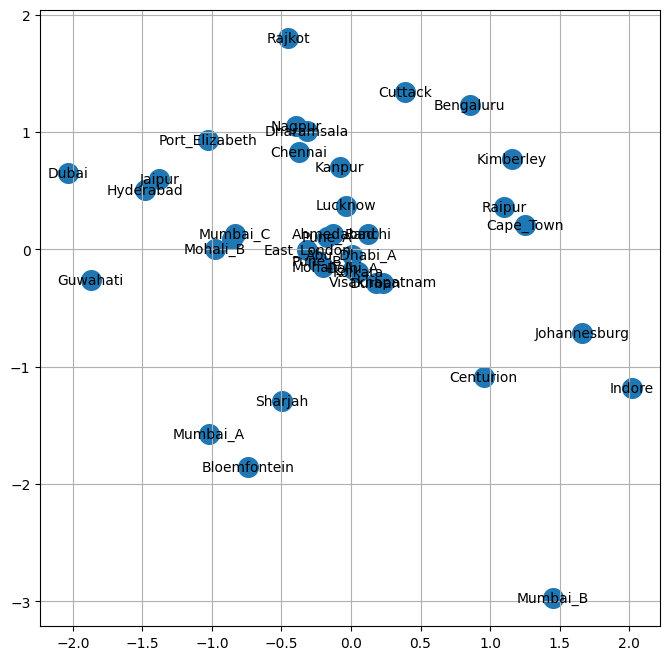

In [232]:
plt.figure(figsize=(8,8))
plt.scatter (C_stadium[:,0].data, C_stadium[:,1].data, s=200)
for i in range (36):
    plt.text(C_stadium[i+1,0].item(), C_stadium[i+1,1].item(), itostadium[i+1], ha="center",va = "center" , color = "black")
plt.grid('minor')